In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [3]:
# Set up
import sys

sys.path.append("/home/dchen/BA_CH_EN/")

# Basics
import tensorflow as tf
import xarray as xr
import numpy as np
from scipy.stats import norm
import scipy.stats as stats
import matplotlib.pyplot as plt

# Helpful
from tqdm import tqdm

# Visualization
import matplotlib.pyplot as plt

# My Methods
from src.utils.CRPS import *  # CRPS metrics
from src.utils.data_split import *  # Splitting data into X and y
from src.utils.drn_make_X_array import *  # Import make train array functions (make_X_array)
from src.models.EMOS import *  # EMOS implementation
from src.models.DRN.DRN_model import *  # DRN implementation
from src.models.DRN.DRN_load_preds import *
from src.models.DRN.DRN_load_preds_dummy_10 import *
from src.models.EMOS_local.EMOS_local_load_preds import *  # Load EMOS_global_preds
from src.models.EMOS_global.EMOS_global_load_score import *  # Load EMOS_global_scores
from src.models.EMOS_global.EMOS_global_load_preds import *  # Load EMOS_global_preds
from src.models.EMOS_global.EMOS_global_load_model import *  # Load EMOS_global_models
import data.raw.load_data_raw as ldr  # Load raw data
import data.processed.load_data_processed as ldp  # Load processed data normed
import data.processed.load_data_processed_denormed as ldpd  # Load processed data denormed
from src.models.CRPS_baseline.CRPS_load import *  # Load CRPS scores
from src.models.U_net.u_net_load_score import *
from src.models.U_net.u_net_load_preds import *
from src.models.U_net.u_net_load_preds import *

<IPython.core.display.Javascript object>

### 0. Setup

In [12]:
var_names = ["u10", "v10", "t2m", "t850", "z500", "ws10"]
random.seed(7)
# setup:
ran_lat = random.randint(0, 119)
ran_lon = random.randint(0, 129)
ran_forecast_date = random.randint(0, 356)
ran_lead_time = random.randint(0, 30)
lead_times = [1, 15, 30]  # Lead times to plot boxplot with
lead_time = 0

<IPython.core.display.Javascript object>

### 1. Load Predictions

In [8]:
# EMOS_global
EMOS_global_t2m_preds = EMOS_global_load_preds("t2m")
EMOS_global_ws10_preds = EMOS_global_load_preds("ws10")

# EMOS_local
EMOS_local_t2m_preds = EMOS_local_load_preds("t2m")
EMOS_local_ws10_preds = EMOS_local_load_preds("ws10")

# DRN
DRN_t2m_preds = DRN_load_preds_dummy_10("t2m")
DRN_ws10_preds = DRN_load_preds_dummy_10("ws10")

# U_net
u_net_t2m_preds = u_net_load_preds("t2m")
u_net_ws10_preds = u_net_load_preds("ws10")

<IPython.core.display.Javascript object>

### 2. Heatmap

#### 2.1 Heatmap mean predictions

In [22]:
def plot_heatmaps(random_forecast_date):
    # Load predictions
    EMOS_global_t2m_preds = EMOS_global_load_preds("t2m")
    EMOS_global_ws10_preds = EMOS_global_load_preds("ws10")
    EMOS_local_t2m_preds = EMOS_local_load_preds("t2m")
    EMOS_local_ws10_preds = EMOS_local_load_preds("ws10")
    DRN_t2m_preds = DRN_load_preds_dummy_10("t2m")
    DRN_ws10_preds = DRN_load_preds_dummy_10("ws10")
    u_net_t2m_preds = u_net_load_preds("t2m")
    u_net_ws10_preds = u_net_load_preds("ws10")

    models_t2m = [EMOS_global_t2m_preds, EMOS_local_t2m_preds, DRN_t2m_preds, u_net_t2m_preds]
    models_ws10 = [EMOS_global_ws10_preds, EMOS_local_ws10_preds, DRN_ws10_preds, u_net_ws10_preds]
    model_names = ["EMOS_global", "EMOS_local", "DRN", "U-net"]

    # Create figure with 2x4 subplots
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))

    for i in range(4):
        # t2m heatmap
        t2m_data = models_t2m[i][0][random_forecast_date, :, :, 0]  # Assuming first index is lead time
        im_t2m = axes[0, i].imshow(t2m_data, cmap='inferno', vmin=280, vmax=310, interpolation='nearest')
        axes[0, i].set_title(f"{model_names[i]} t2m Mean Predictions")

        # ws10 heatmap
        ws10_data = models_ws10[i][0][random_forecast_date, :, :, 0]
        im_ws10 = axes[1, i].imshow(ws10_data, cmap='viridis', vmin=1, vmax=12, interpolation='nearest')
        axes[1, i].set_title(f"{model_names[i]} ws10 Mean Predictions")

    # Display color bars
    fig.colorbar(im_t2m, ax=axes[0, :].ravel().tolist(), orientation='horizontal')
    fig.colorbar(im_ws10, ax=axes[1, :].ravel().tolist(), orientation='horizontal')

    plt.show()

<IPython.core.display.Javascript object>

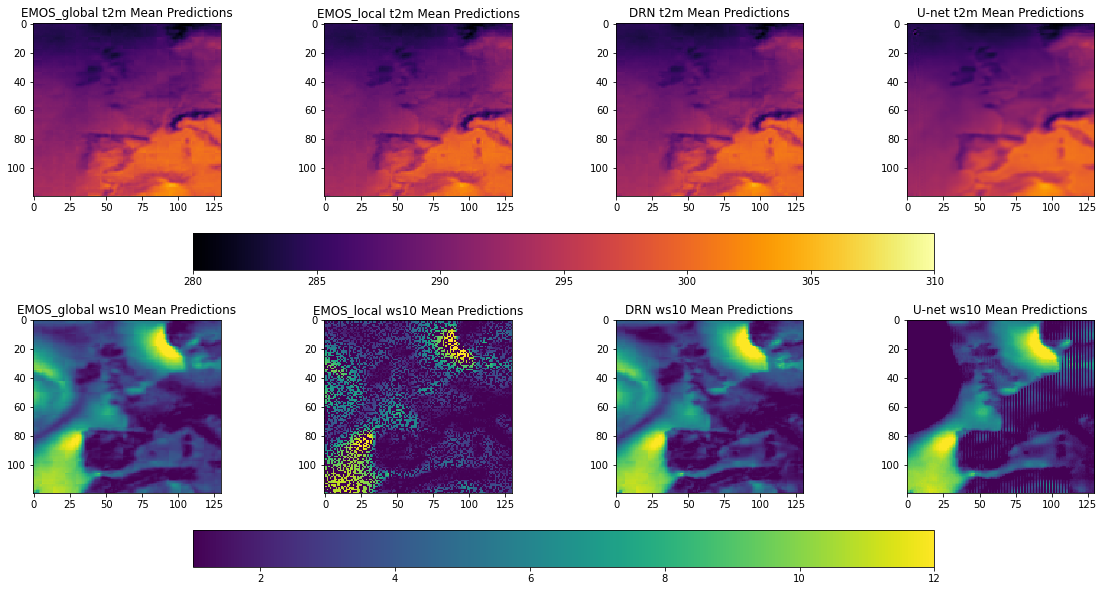

<IPython.core.display.Javascript object>

In [23]:
# Call the function
plot_heatmaps(ran_forecast_date)